In [1]:
import random
import networkx as nx
from matplotlib import pyplot as plt, animation
import numpy as np
import itertools
import pandas as pd

In [2]:
def generate_random_city_graph(connection_prob=0.1, min_weight=1, max_weight=100):
    """
    Generate a random graph representing cities connected with weighted edges.

    Parameters:
    - num_cities (int): Number of cities (nodes) in the graph.
    - connection_prob (float): Probability of a connection (edge) between any two cities.
    - min_weight (int): Minimum weight (distance) for the edges.
    - max_weight (int): Maximum weight (distance) for the edges.

    Returns:
    - G (networkx.Graph): A NetworkX graph with cities as nodes and weighted edges.
    """
    num_cities = random.randint(5,10) # Generate just from 20 to 26 because I want only alphabet characters as nodes
    # Generate random city names (A, B, C, ...)
    city_names = [chr(65 + i) for i in range(num_cities)]

    # Create a graph
    G = nx.Graph()

    # Add cities as nodes
    G.add_nodes_from(city_names)

    # Randomly connect cities with random weights (distances)
    for i in range(num_cities):
        for j in range(i + 1, num_cities):
            weight = random.randint(min_weight, max_weight)  # Random distance
            G.add_edge(city_names[i], city_names[j], weight=weight)

    return G

In [3]:
# Example usage
random_graph = generate_random_city_graph()

In [4]:
def draw_graph(G):
    """
    Draw the generated graph with cities and weighted connections.

    Parameters:
    - G (networkx.Graph): The graph to be drawn.
    """
    pos = nx.spring_layout(G)
    edges = G.edges(data=True)

    # Clear any previous plot
    plt.clf()
    
    # Draw the graph
    nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=5, font_weight='bold')
    #nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in edges})
    #nx.draw_networkx_edge(G, pos, with_labels=False)

    plt.title("Graph")
    plt.show()
    return pos

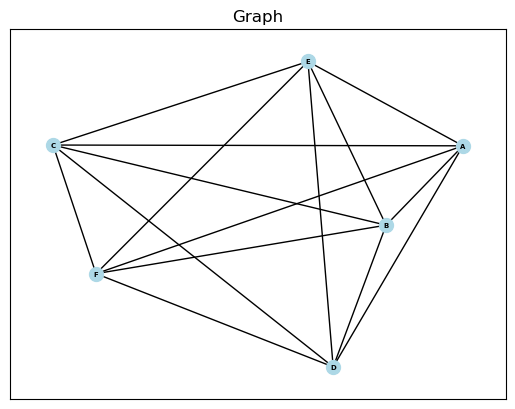

In [5]:
originalLayout = draw_graph(random_graph)

In [6]:
list(random_graph.nodes)[0]

'A'

In [7]:
len(random_graph)

6

In [8]:
class Solution:
    def __init__(self, dimension, lower_bound, upper_bound):
        self.d = dimension
        self.lower = lower_bound # we will use the same bounds for all parameters
        self.upper = upper_bound
        self.params = np.zeros(self.d) #solution parameters
        self.f = np.inf # objective function evaluation

In [19]:
class Ant():
    def __init__(self, startPosition):
        self.path = []
        self.startPosition = startPosition
        self.position = startPosition
        self.path.append(startPosition)
        self.travelledDistance = 0
        self.visibilityMatrix = None

    def goToNextSpot(self, spotIndex):
        self.path.append(spotIndex)
        self.position = spotIndex
    def finished(self):
        self.path.append(self.startPosition)
        self.travelledDistance = 0
        for i in range(1, len(self.path)):
            self.travelledDistance += self.visibilityMatrix[self.path[i-1]][self.path[i]] # From -> To 
        print(f"Total distance: {self.travelledDistance}")
    def getCurrentPosition(self):
        return self.position

# Takes count of ants and position where they are going to start
def spawnAnts(n, startPosition) -> list[Ant]:
    antPopulation = []
    for i in range(0, n):
        antPopulation.append(Ant(startPosition=startPosition))
    return antPopulation

# Pass count of nodes, inits pheromone matrix full of 1's
def initPheromone(n):
    matrix = []
    for i in range(0,n):
        matrix.append([])
        for j in range(0,n):
            matrix[i].append(1)
    return matrix

# Pass distance matrix, returns visibility matrix based on 1/d[i][j] formula
def initVisibilityMatrix(distanceMatrix):
    matrix = []
    n = len(distanceMatrix)
    for i in range(0,n):
        matrix.append([])
        for j in range(0,n):
            if i != j:
                visibility = 1/distanceMatrix[i][j]
                matrix[i].append(visibility)
            else:
                matrix[i].append(0)
    return matrix

# Pass visibility matrix and index of column you want to null
def nullColumn(visibilityMatrix, j):
    n = len(visibilityMatrix)
    for i in range(0, n):
        visibilityMatrix[i][j] = 0
    return visibilityMatrix

def decideNextPath(visibilityMatrix, pheromones, currentPosition, alpha = 1, beta = 2):
    probabilites = []
    n = len(visibilityMatrix) - 1 # -1 because we can only go to n-1 cities from current city
    for j in range(0, n):
        if currentPosition != j:
            probability = pow(pheromones[currentPosition][j], alpha) * pow(visibilityMatrix[currentPosition][j], beta) # TODO: Finish this formula
            probabilites.append(probability)
    probSum = sum(probabilites)
    probabilites = np.array(probabilites)/probSum
    r = random.uniform(0,1)
    for i in range(1, len(probabilites)):
        probabilites[i] = probabilites[i] + probabilites[i-1]
    for i in range(len(probabilites) - 1):
        if r < probabilites[i]:
            print(f"Random number: {r}, probabilities: {probabilites}, result: {i}")
            return i
        if r >= probabilites[i] and r <= probabilites[i + 1]:
            print(f"Random number: {r}, probabilities: {probabilites}, result: {i}")
            return i + 1

#Main algorithm
def AntColony(G, func):
    distanceMatrix = nx.adjacency_matrix(G).toarray() # Get distance matrix
    startPosition = 0 # Start from random? position, this position stays the same for entirety of algorithm
    antCount = 10
    ants = spawnAnts(antCount, startPosition)
    pheromones = initPheromone(len(G)) # Init pheromone matrix
    
    alpha = 1
    beta = 2
    max_iters = 1 # 1 For now, later 100
    for _ in range(0,max_iters):
        for ant in ants:
            # Here do logic for ants pathing
            visibilityMatrix = initVisibilityMatrix(distanceMatrix=distanceMatrix) # Each ant has its own visibility matrix
            visibilityMatrix = nullColumn(visibilityMatrix, startPosition) # Null start position
            ant.visibilityMatrix = visibilityMatrix
            for i in range(len(G) - 1): # - 1 because we cant go to startPosition
                nextSpot = decideNextPath(visibilityMatrix, pheromones, ant.getCurrentPosition())
                ant.goToNextSpot(nextSpot)
                visibilityMatrix = nullColumn(visibilityMatrix, ant.getCurrentPosition()) # Null start position
            ant.finished()
    


In [20]:
AntColony(random_graph, initPheromone(1)) # Some random func as placeholder

Random number: 0.6263543994563375, probabilities: [0.04696593 0.10608544 0.92740694 1.        ], result: 1
Random number: 0.5706992280296836, probabilities: [0.         0.02114925 0.961116   1.        ], result: 1
Random number: 0.6577266276460944, probabilities: [0.         0.02114925 0.961116   1.        ], result: 1
Random number: 0.36233444685314187, probabilities: [0.         0.02114925 0.961116   1.        ], result: 1
Random number: 0.7399763132689433, probabilities: [0.         0.02114925 0.961116   1.        ], result: 1
Total distance: 0
Random number: 0.6007862147052019, probabilities: [0.04696593 0.10608544 0.92740694 1.        ], result: 1
Random number: 0.08643776297628547, probabilities: [0.         0.02114925 0.961116   1.        ], result: 1
Random number: 0.9194773793656968, probabilities: [0.         0.02114925 0.961116   1.        ], result: 1
Random number: 0.5663670859312379, probabilities: [0.         0.02114925 0.961116   1.        ], result: 1
Random number: 0.

C:\Users\Michal\AppData\Local\Temp\ipykernel_10196\2393808301.py:81: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  distanceMatrix = nx.adjacency_matrix(G).toarray() # Get distance matrix
